In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kacpergregorowicz/house-plant-species")

print("Path to dataset files:", path)

100%|██████████| 4.85G/4.85G [01:29<00:00, 57.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kacpergregorowicz/house-plant-species/versions/4


In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

images_directory = "/root/.cache/kagglehub/datasets/kacpergregorowicz/house-plant-species/versions/4/house_plant_species/Monstera Deliciosa (Monstera deliciosa)"

image_files = [f for f in os.listdir(images_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
print(len(image_files))

539


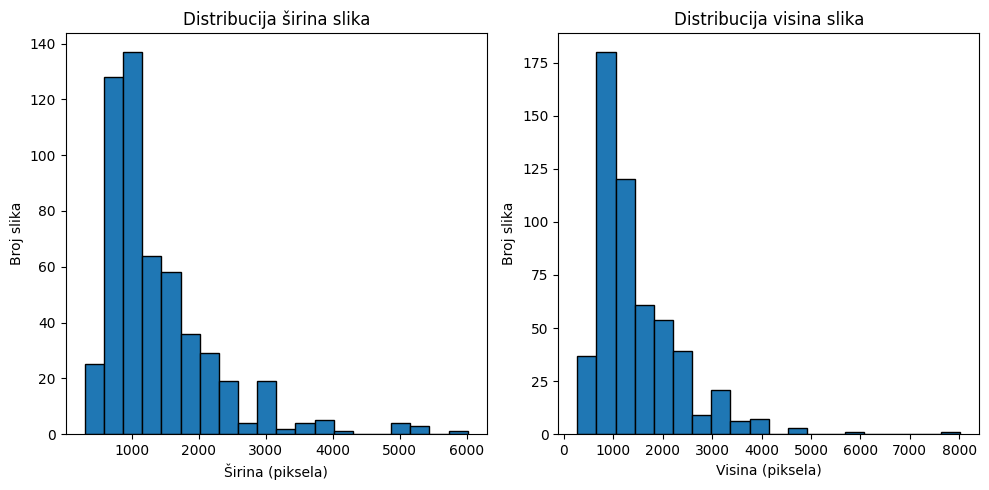

In [3]:
dimensions = []
for image_file in image_files:
    image_path = os.path.join(images_directory, image_file)
    with Image.open(image_path) as img:
        dimensions.append(img.size)

widths, heights = zip(*dimensions)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, edgecolor='black')
plt.title('Distribucija širina slika')
plt.xlabel('Širina (piksela)')
plt.ylabel('Broj slika')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, edgecolor='black')
plt.title('Distribucija visina slika')
plt.xlabel('Visina (piksela)')
plt.ylabel('Broj slika')

plt.tight_layout()
plt.show()

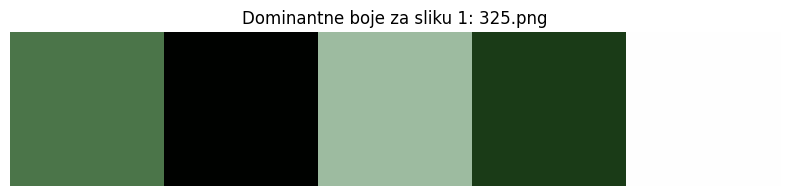

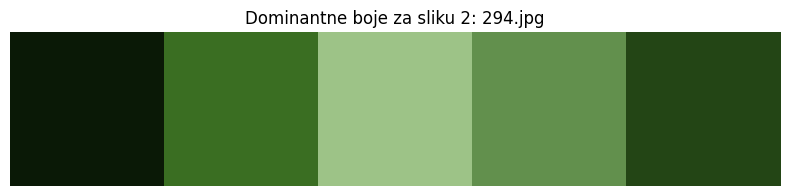

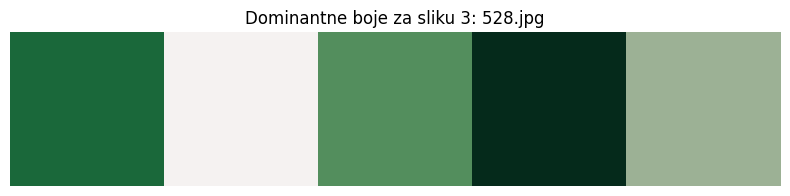

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


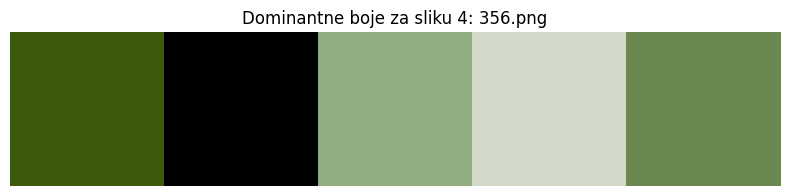

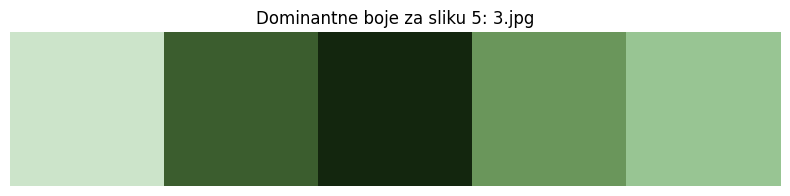

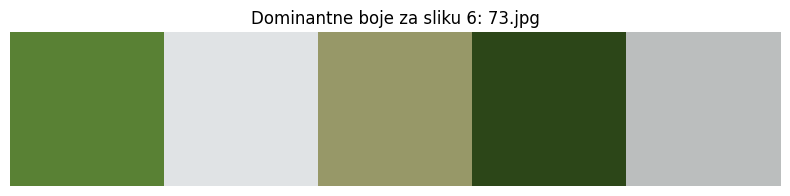

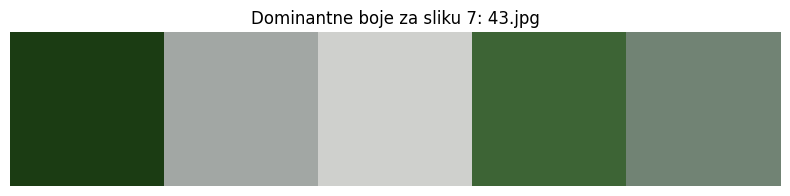

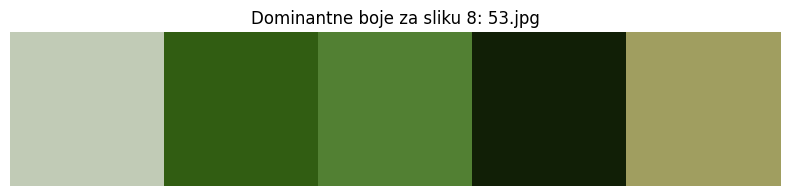

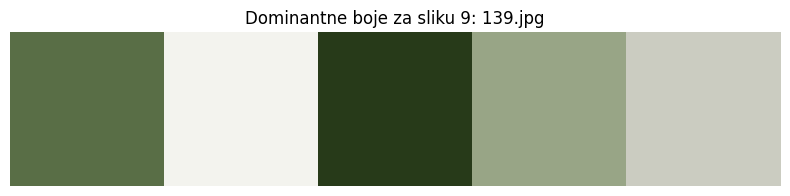

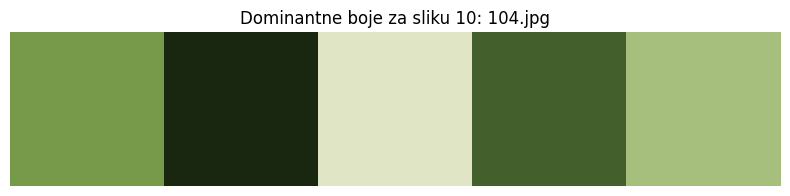

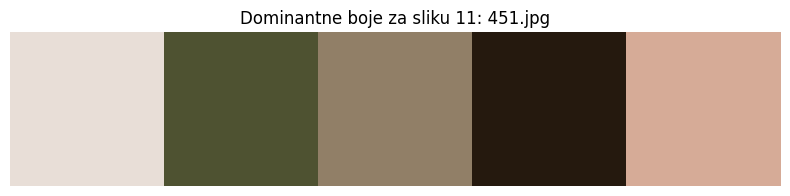

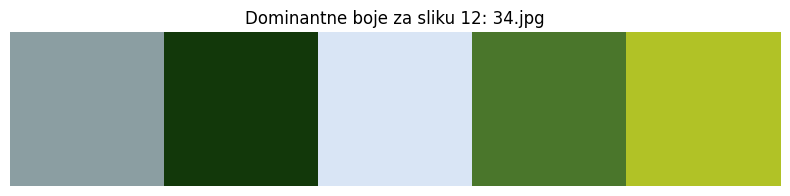

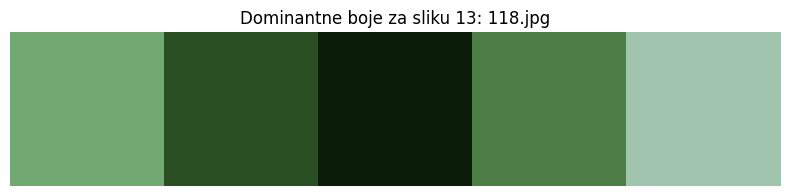

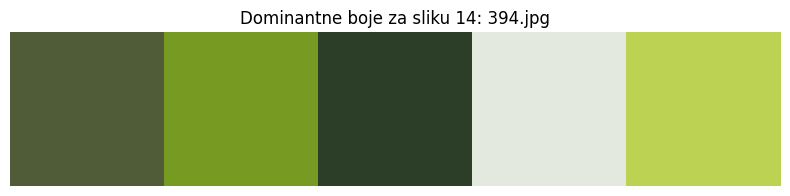

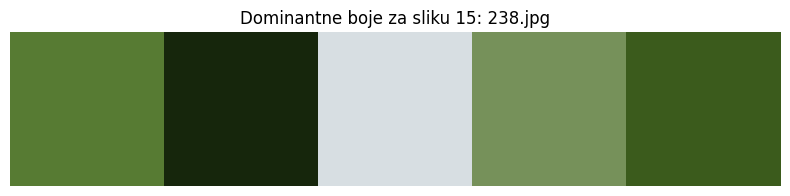

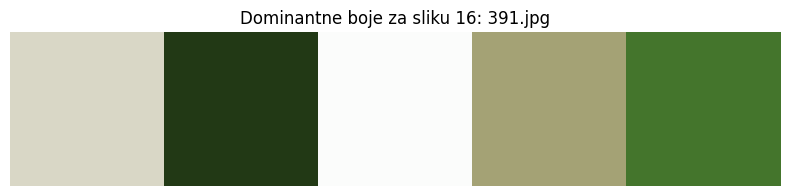

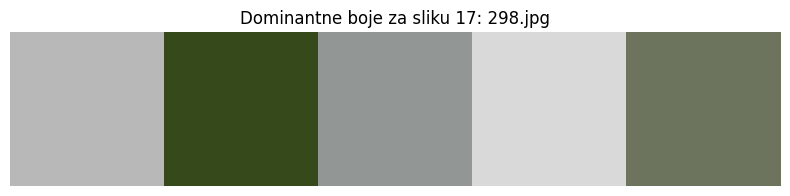

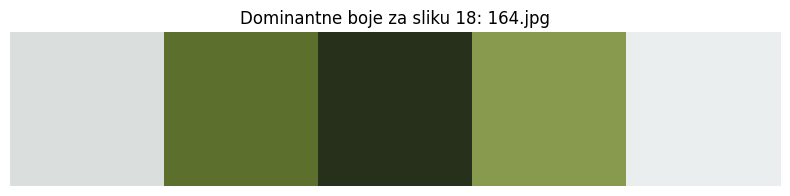

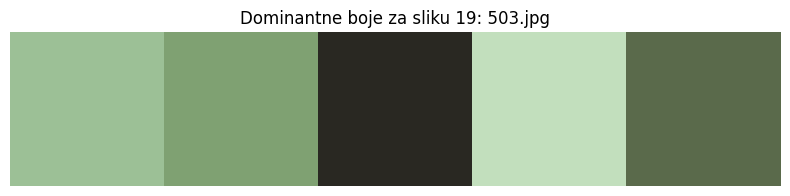

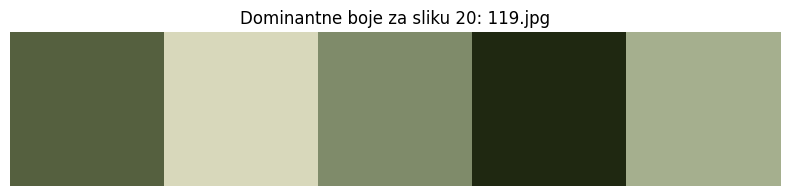

In [4]:
from sklearn.cluster import KMeans
import numpy as np

def extract_dominant_colors(image, n_colors=5):
    img_array = np.array(image)
    img_array = img_array.reshape(-1, 3)
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(img_array)
    colors = kmeans.cluster_centers_
    return colors

for i, image_file in enumerate(image_files[:20]):
    image_path = os.path.join(images_directory, image_file)
    with Image.open(image_path) as img:
        img = img.convert('RGB')
        dominant_colors = extract_dominant_colors(img)

        plt.figure(figsize=(10, 2))
        plt.imshow([dominant_colors / 255.0])
        plt.title(f"Dominantne boje za sliku {i + 1}: {image_file}")
        plt.axis('off')
        plt.show()

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


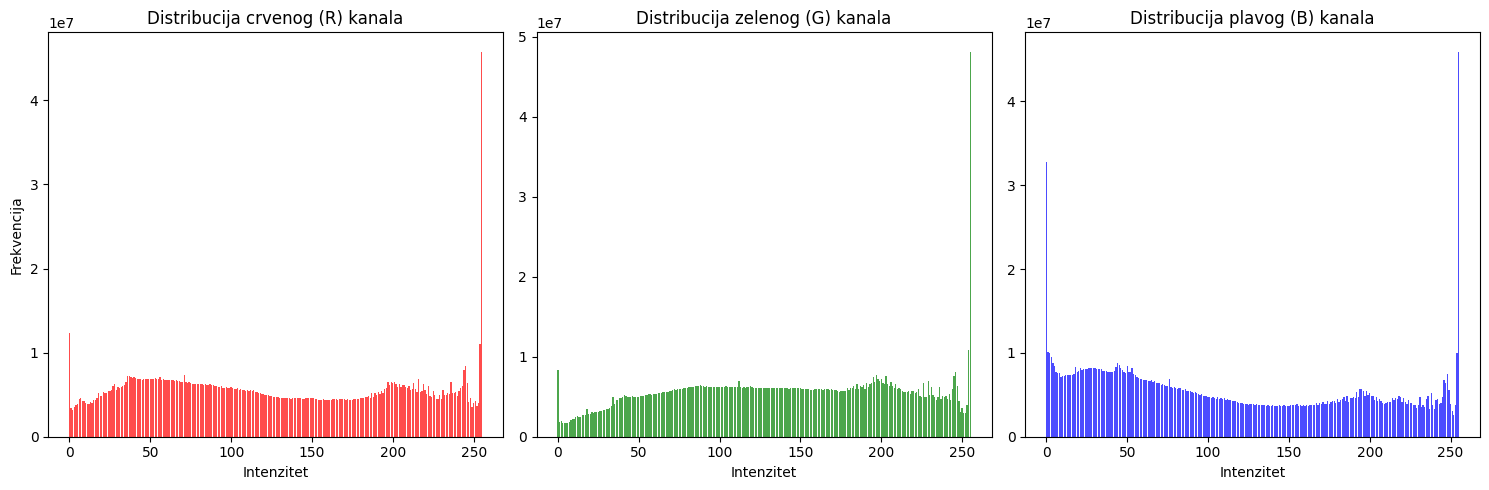

In [5]:
import numpy as np

red_hist = np.zeros(256)
green_hist = np.zeros(256)
blue_hist = np.zeros(256)

for image_file in image_files:
    image_path = os.path.join(images_directory, image_file)
    with Image.open(image_path) as img:
        img = img.convert('RGB')
        r, g, b = img.split()

        red_hist += np.histogram(np.array(r).flatten(), bins=256, range=(0, 256))[0]
        green_hist += np.histogram(np.array(g).flatten(), bins=256, range=(0, 256))[0]
        blue_hist += np.histogram(np.array(b).flatten(), bins=256, range=(0, 256))[0]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(256), red_hist, color='red', alpha=0.7)
plt.title('Distribucija crvenog (R) kanala')
plt.xlabel('Intenzitet')
plt.ylabel('Frekvencija')

plt.subplot(1, 3, 2)
plt.bar(range(256), green_hist, color='green', alpha=0.7)
plt.title('Distribucija zelenog (G) kanala')
plt.xlabel('Intenzitet')

plt.subplot(1, 3, 3)
plt.bar(range(256), blue_hist, color='blue', alpha=0.7)
plt.title('Distribucija plavog (B) kanala')
plt.xlabel('Intenzitet')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


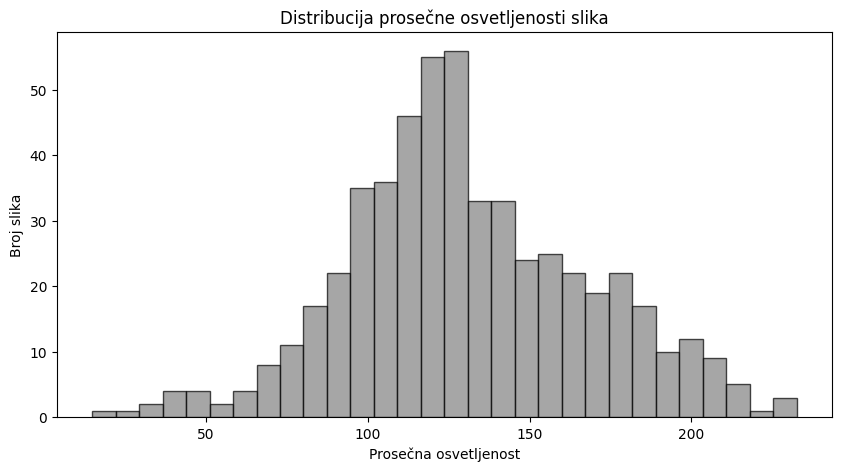

In [6]:
brightness_values = []

for image_file in image_files:
    image_path = os.path.join(images_directory, image_file)
    with Image.open(image_path) as img:
        img_gray = img.convert('L')
        img_array = np.array(img_gray)

        avg_brightness = img_array.mean()
        brightness_values.append(avg_brightness)

plt.figure(figsize=(10, 5))
plt.hist(brightness_values, bins=30, edgecolor='black', color='gray', alpha=0.7)
plt.title("Distribucija prosečne osvetljenosti slika")
plt.xlabel("Prosečna osvetljenost")
plt.ylabel("Broj slika")
plt.show()



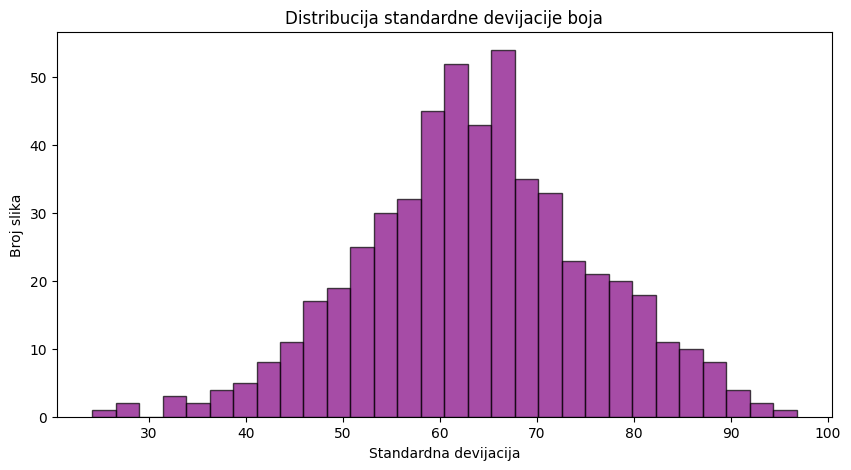

In [7]:
std_devs = []

for image_file in image_files:
    image_path = os.path.join(images_directory, image_file)
    with Image.open(image_path) as img:
        img = img.convert('RGB')
        img_array = np.array(img)

        std_r = np.std(img_array[:, :, 0])
        std_g = np.std(img_array[:, :, 1])
        std_b = np.std(img_array[:, :, 2])

        std_devs.append((std_r + std_g + std_b) / 3)

plt.figure(figsize=(10, 5))
plt.hist(std_devs, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title("Distribucija standardne devijacije boja")
plt.xlabel("Standardna devijacija")
plt.ylabel("Broj slika")
plt.show()

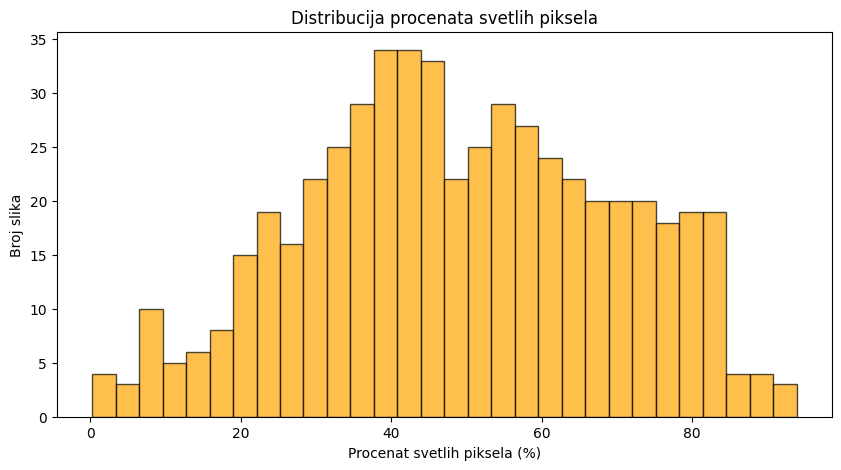

In [8]:
import numpy as np
light_pixel_ratios = []

for image_file in image_files:
    image_path = os.path.join(images_directory, image_file)
    with Image.open(image_path) as img:
        img_gray = img.convert('L')
        img_array = np.array(img_gray)

        total_pixels = img_array.size
        light_pixels = np.sum(img_array > 128)
        dark_pixels = np.sum(img_array <= 128)

        light_pixel_ratio = (light_pixels / total_pixels) * 100
        light_pixel_ratios.append(light_pixel_ratio)

plt.figure(figsize=(10, 5))
plt.hist(light_pixel_ratios, bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title("Distribucija procenata svetlih piksela")
plt.xlabel("Procenat svetlih piksela (%)")
plt.ylabel("Broj slika")
plt.show()

In [9]:
from collections import Counter
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:

def get_dominant_color_kmeans(image_array, n_colors=3):
    pixels = image_array.reshape(-1, 3)

    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(pixels)

    cluster_counts = Counter(kmeans.labels_)
    dominant_cluster = cluster_counts.most_common(1)[0][0]
    dominant_color = kmeans.cluster_centers_[dominant_cluster]

    return tuple(dominant_color.astype(int))

In [11]:
target_size = (227, 227)
images_directory = "/root/.cache/kagglehub/datasets/kacpergregorowicz/house-plant-species/versions/4/house_plant_species/Monstera Deliciosa (Monstera deliciosa)"
resized_images = []
dominant_colors = []

image_files = os.listdir(images_directory)
for image_file in image_files:
    image_path = os.path.join(images_directory, image_file)
    with Image.open(image_path) as img:
        img = img.convert("RGB")
        img_resized = img.resize(target_size)
        img_array = np.array(img_resized)
        resized_images.append(img_array)

        dominant_color = get_dominant_color_kmeans(img_array, n_colors=3)
        dominant_colors.append(dominant_color)

print(f"Dimenzije svake slike: {resized_images[0].shape}")

dominant_colors = np.array(dominant_colors) / 255.0

class DominantColorDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx] / 255.0
        img = np.transpose(img, (2, 0, 1))
        label = self.labels[idx]
        return torch.tensor(img, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)

dataset = DominantColorDataset(resized_images, dominant_colors)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Dimenzije svake slike: (227, 227, 3)


**Prva verzija modela**

In [24]:
class AlexNetVersion1(nn.Module):
    def __init__(self):
        super(AlexNetVersion1, self).__init__()
        self.conv1 = nn.Conv2d(3, 96, kernel_size=11, stride=4)
        self.conv2 = nn.Conv2d(96, 256, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(384, 384, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
        self.max_pool = nn.MaxPool2d(3, stride=2)

        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 3)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.max_pool(x)

        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlexNetVersion1().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

def train_model(model, train_loader, optimizer, criterion, epoch):
    model.train()
    running_loss = 0.0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Train Epoch {epoch}, Loss: {running_loss / len(train_loader):.4f}")

def validate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    avg_rgb_error = np.zeros(3)
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            val_loss += criterion(output, target).item()
            avg_rgb_error += torch.abs(output - target).sum(dim=0).cpu().numpy()
    val_loss /= len(val_loader)
    avg_rgb_error /= len(val_loader.dataset)
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Average RGB Error: R: {avg_rgb_error[0]:.4f}, G: {avg_rgb_error[1]:.4f}, B: {avg_rgb_error[2]:.4f}")

num_epochs = 25
for epoch in range(1, num_epochs + 1):
    train_model(model, train_loader, optimizer, criterion, epoch)
    validate_model(model, val_loader, criterion)

Train Epoch 1, Loss: 39.1027
Validation Loss: 0.2641
Average RGB Error: R: 0.4115, G: 0.4437, B: 0.3675
Train Epoch 2, Loss: 0.1698
Validation Loss: 0.1087
Average RGB Error: R: 0.2869, G: 0.2697, B: 0.3009
Train Epoch 3, Loss: 0.0987
Validation Loss: 0.1063
Average RGB Error: R: 0.2936, G: 0.2759, B: 0.3086
Train Epoch 4, Loss: 0.0980
Validation Loss: 0.0833
Average RGB Error: R: 0.2540, G: 0.2405, B: 0.2676
Train Epoch 5, Loss: 0.0840
Validation Loss: 0.0725
Average RGB Error: R: 0.2231, G: 0.2157, B: 0.2410
Train Epoch 6, Loss: 0.0697
Validation Loss: 0.0700
Average RGB Error: R: 0.2157, G: 0.2151, B: 0.2228
Train Epoch 7, Loss: 0.0555
Validation Loss: 0.0467
Average RGB Error: R: 0.1710, G: 0.1662, B: 0.1863
Train Epoch 8, Loss: 0.0426
Validation Loss: 0.0457
Average RGB Error: R: 0.1720, G: 0.1666, B: 0.1788
Train Epoch 9, Loss: 0.0394
Validation Loss: 0.0419
Average RGB Error: R: 0.1576, G: 0.1564, B: 0.1625
Train Epoch 10, Loss: 0.0366
Validation Loss: 0.0385
Average RGB Error: 

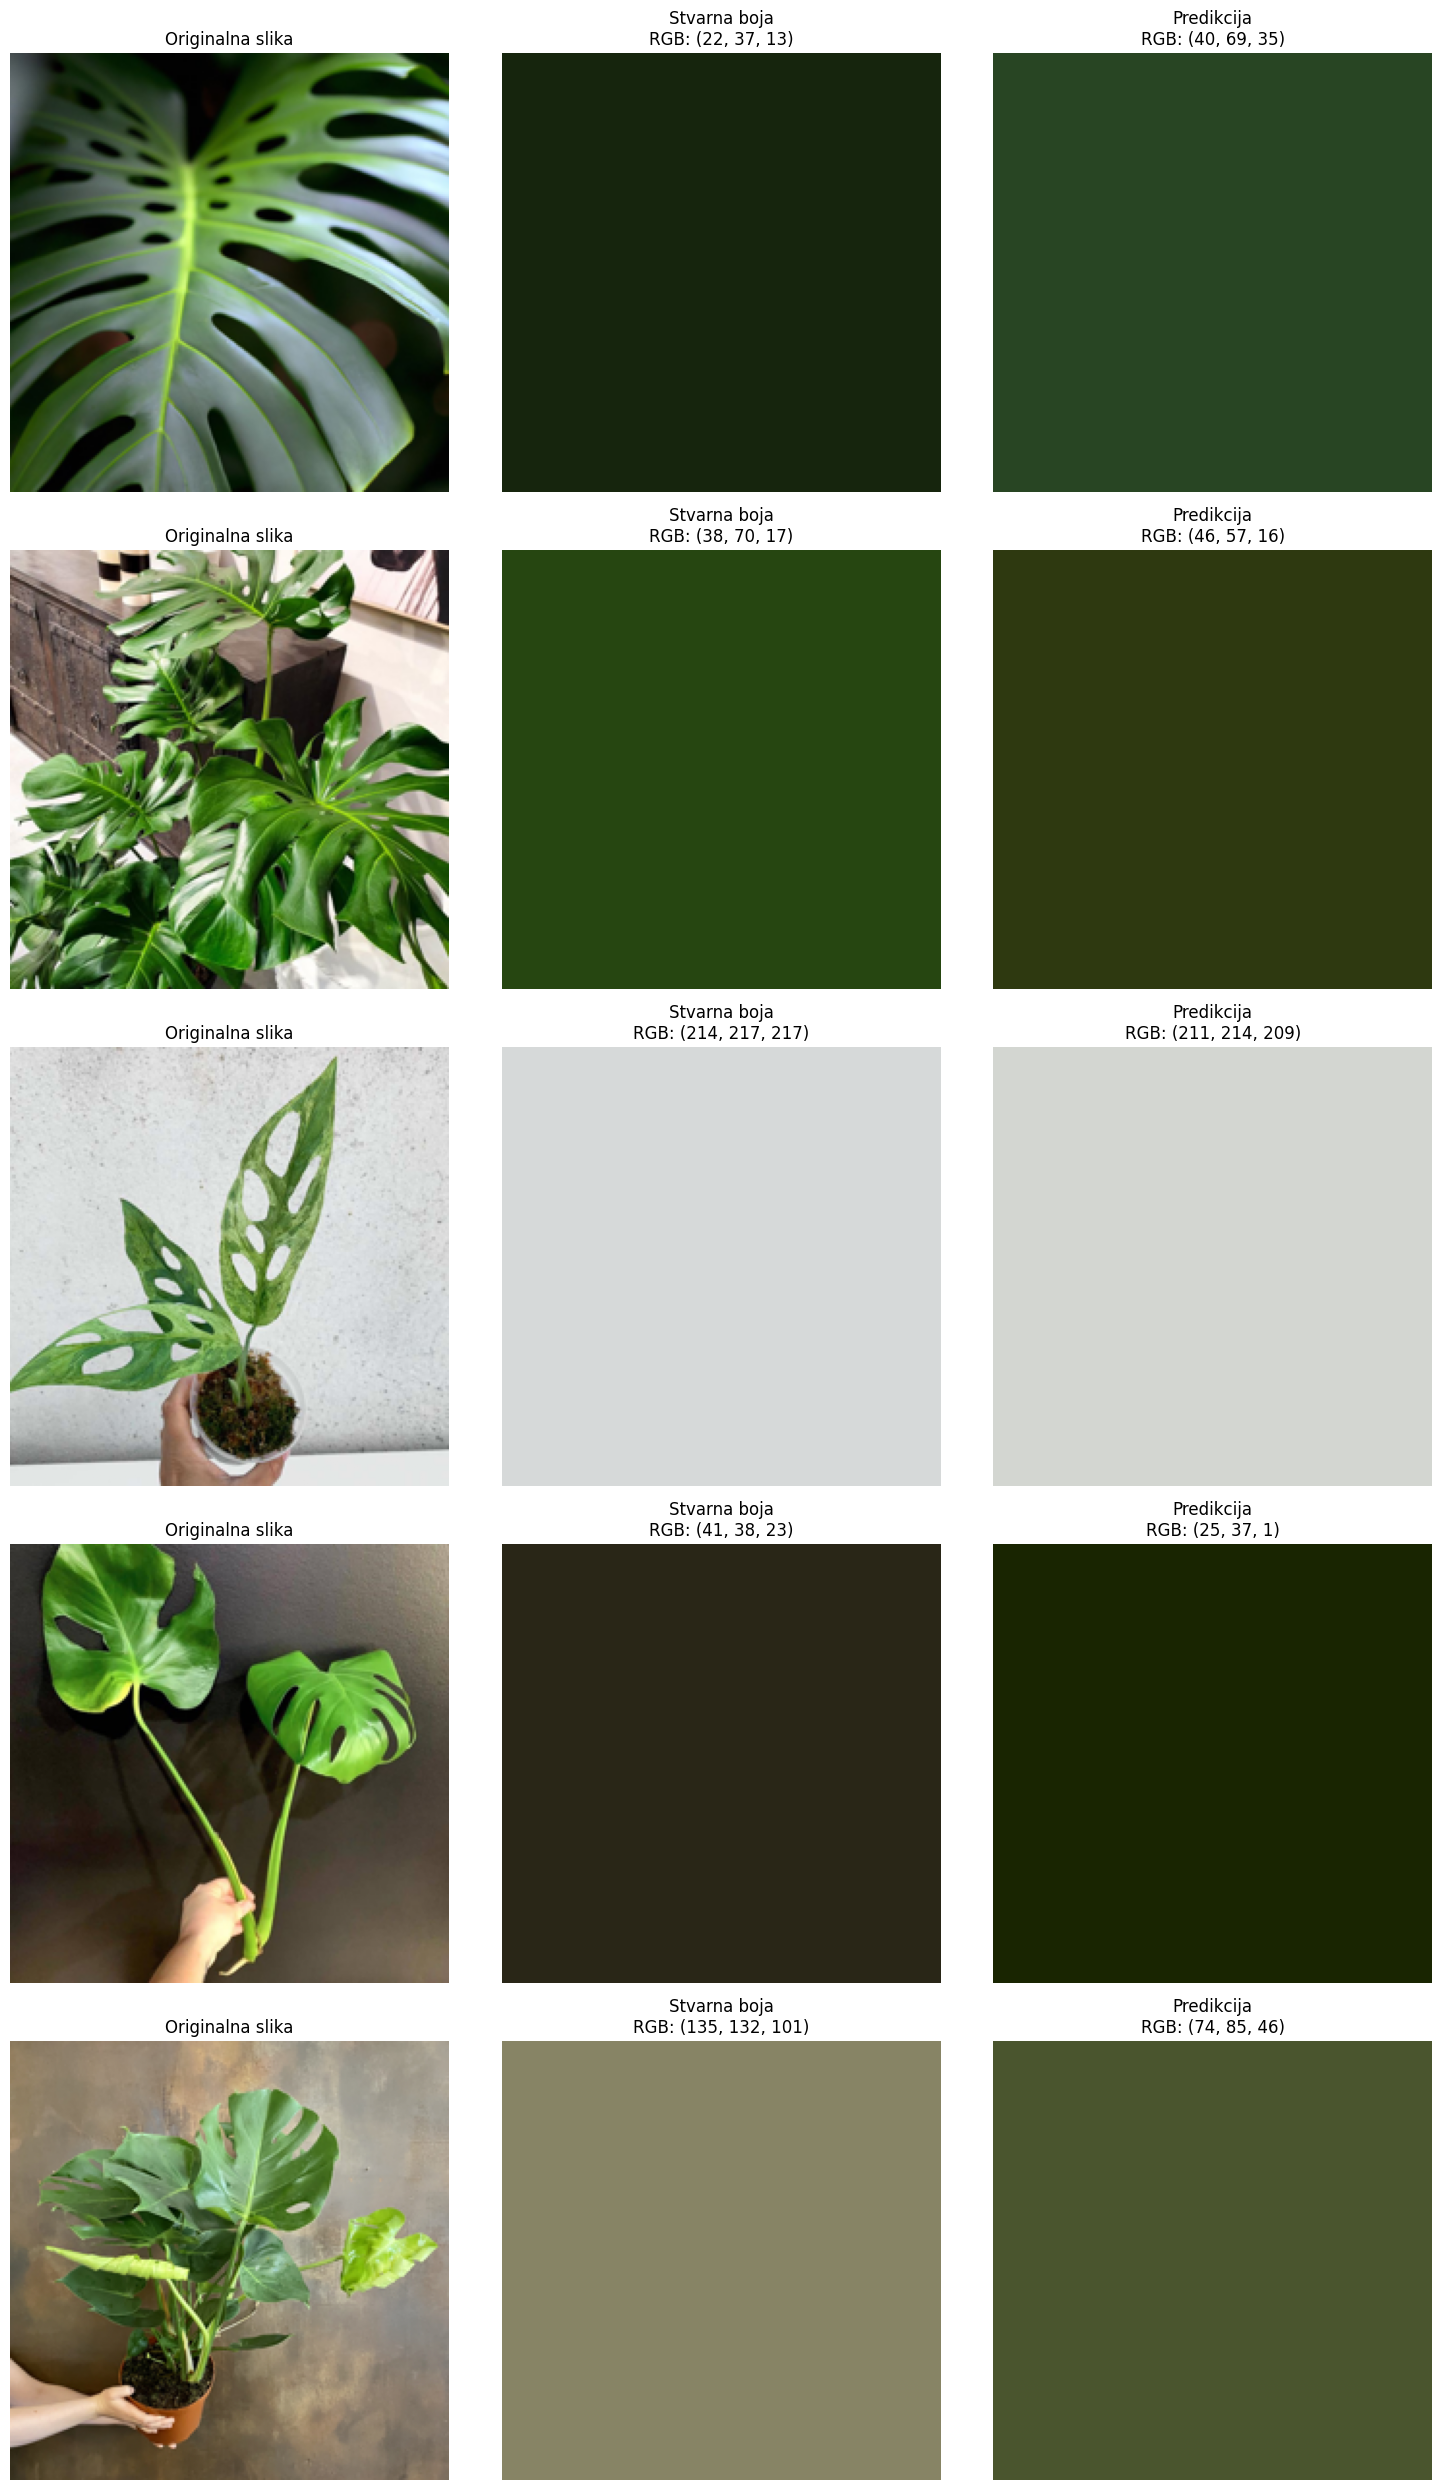

In [ ]:
def visualize_results_alexnet(model, dataset, num_samples=5):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    indices = np.random.choice(len(dataset), num_samples, replace=False)
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, num_samples * 5))

    if num_samples == 1:
        axes = np.expand_dims(axes, 0)

    for i, idx in enumerate(indices):
        img, true_color = dataset[idx]
        img = img.numpy().transpose(1, 2, 0)
        true_color = true_color.numpy()

        img_tensor = torch.tensor(img.transpose(2, 0, 1)).unsqueeze(0).to(device)
        with torch.no_grad():
            predicted_color = model(img_tensor).cpu().squeeze().numpy()

        axes[i, 0].imshow(img)
        axes[i, 0].axis('off')
        axes[i, 0].set_title("Originalna slika")

        axes[i, 1].imshow([[true_color]])
        axes[i, 1].axis('off')
        axes[i, 1].set_title(f"Stvarna boja\nRGB: {tuple((true_color * 255).astype(int))}")

        pred_color_clipped = np.clip(predicted_color, 0, 1)
        axes[i, 2].imshow([[pred_color_clipped]])
        axes[i, 2].axis('off')
        axes[i, 2].set_title(f"Predikcija\nRGB: {tuple((pred_color_clipped * 255).astype(int))}")

    plt.tight_layout()
    plt.show()

visualize_results_alexnet(model, val_dataset, num_samples=5)

**Druga verzija modela**

In [34]:
class AlexNetVersion2(nn.Module):
    def __init__(self):
        super(AlexNetVersion2, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=9, stride=2, padding=4)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=7, padding=3)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=5, padding=2)
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.max_pool = nn.MaxPool2d(3, stride=2)

        self.flatten_size = self._calculate_flatten_size((3, 227, 227))

        self.fc1 = nn.Linear(self.flatten_size, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 3)

    def _calculate_flatten_size(self, input_shape):
        x = torch.rand(1, *input_shape)
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.max_pool(x)
        return x.numel()

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.max_pool(x)

        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlexNetVersion2().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)
criterion = nn.SmoothL1Loss()

train_losses = []
val_losses = []

def train_model(model, train_loader, optimizer, criterion, epoch):
    model.train()
    running_loss = 0.0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Train Epoch {epoch}, Loss: {avg_loss:.4f}")

def validate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    avg_rgb_error = np.zeros(3)
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item()
            avg_rgb_error += torch.abs(output - target).sum(dim=0).cpu().numpy()
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    avg_rgb_error /= len(val_loader.dataset)
    print(f"Validation Loss: {avg_val_loss:.4f}")
    print(f"Average RGB Error: R: {avg_rgb_error[0]:.4f}, G: {avg_rgb_error[1]:.4f}, B: {avg_rgb_error[2]:.4f}")

num_epochs = 25
for epoch in range(1, num_epochs + 1):
    train_model(model, train_loader, optimizer, criterion, epoch)
    validate_model(model, val_loader, criterion)

Train Epoch 1, Loss: 0.1250
Validation Loss: 0.0778
Average RGB Error: R: 0.3579, G: 0.2658, B: 0.2796
Train Epoch 2, Loss: 0.0594
Validation Loss: 0.0434
Average RGB Error: R: 0.2616, G: 0.2507, B: 0.2800
Train Epoch 3, Loss: 0.0314
Validation Loss: 0.0196
Average RGB Error: R: 0.1720, G: 0.1728, B: 0.1547
Train Epoch 4, Loss: 0.0190
Validation Loss: 0.0209
Average RGB Error: R: 0.1696, G: 0.1786, B: 0.1645
Train Epoch 5, Loss: 0.0157
Validation Loss: 0.0151
Average RGB Error: R: 0.1464, G: 0.1539, B: 0.1366
Train Epoch 6, Loss: 0.0169
Validation Loss: 0.0169
Average RGB Error: R: 0.1418, G: 0.1474, B: 0.1470
Train Epoch 7, Loss: 0.0193
Validation Loss: 0.0211
Average RGB Error: R: 0.1703, G: 0.1714, B: 0.1653
Train Epoch 8, Loss: 0.0150
Validation Loss: 0.0161
Average RGB Error: R: 0.1435, G: 0.1495, B: 0.1436
Train Epoch 9, Loss: 0.0155
Validation Loss: 0.0156
Average RGB Error: R: 0.1342, G: 0.1409, B: 0.1420
Train Epoch 10, Loss: 0.0149
Validation Loss: 0.0124
Average RGB Error: R

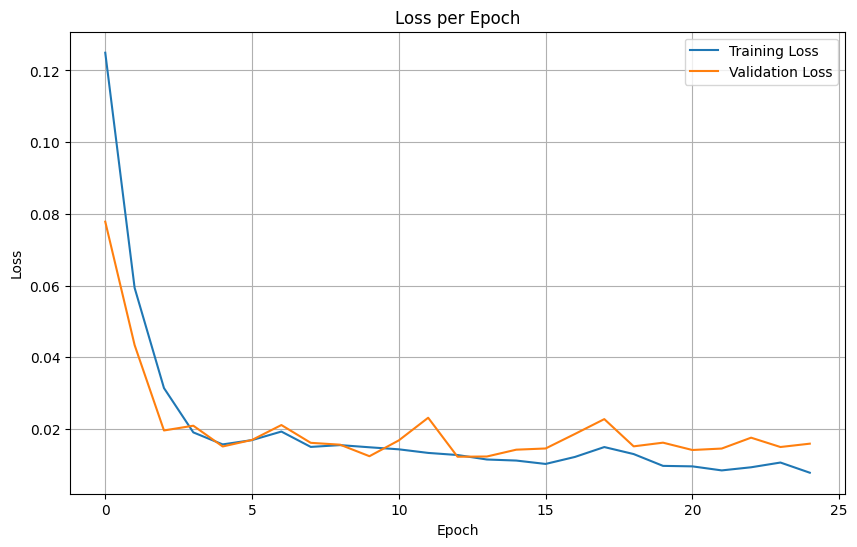

In [35]:
import matplotlib.pyplot as plt

def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_losses(train_losses, val_losses)


**Treca verzija modela**

In [22]:
class AlexNetVersion3(nn.Module):
    def __init__(self):
        super(AlexNetVersion3, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
        self.max_pool = nn.MaxPool2d(3, stride=2)

        flatten_size = self.calculate_flatten_size((3, 227, 227))
        self.fc1 = nn.Linear(flatten_size, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 3)

    def calculate_flatten_size(self, input_shape):
        x = torch.rand(1, *input_shape)
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.max_pool(x)
        return x.numel()

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.max_pool(x)

        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlexNetVersion3().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

train_losses = []
val_losses = []

def train_model(model, train_loader, optimizer, criterion, epoch):
    model.train()
    running_loss = 0.0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Train Epoch {epoch}, Loss: {avg_loss:.4f}")

def validate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    avg_rgb_error = np.zeros(3)
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item()
            avg_rgb_error += torch.abs(output - target).sum(dim=0).cpu().numpy()
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    avg_rgb_error /= len(val_loader.dataset)
    print(f"Validation Loss: {avg_val_loss:.4f}")
    print(f"Average RGB Error: R: {avg_rgb_error[0]:.4f}, G: {avg_rgb_error[1]:.4f}, B: {avg_rgb_error[2]:.4f}")


num_epochs = 25
for epoch in range(1, num_epochs + 1):
    train_model(model, train_loader, optimizer, criterion, epoch)
    validate_model(model, val_loader, criterion)

Train Epoch 1, Loss: 0.6394
Validation Loss: 0.2264
Average RGB Error: R: 0.3589, G: 0.4224, B: 0.3121
Train Epoch 2, Loss: 0.2096
Validation Loss: 0.1304
Average RGB Error: R: 0.3221, G: 0.3020, B: 0.3222
Train Epoch 3, Loss: 0.1055
Validation Loss: 0.0686
Average RGB Error: R: 0.2206, G: 0.2170, B: 0.2344
Train Epoch 4, Loss: 0.0575
Validation Loss: 0.0381
Average RGB Error: R: 0.1587, G: 0.1661, B: 0.1612
Train Epoch 5, Loss: 0.0437
Validation Loss: 0.0338
Average RGB Error: R: 0.1496, G: 0.1528, B: 0.1435
Train Epoch 6, Loss: 0.0336
Validation Loss: 0.0322
Average RGB Error: R: 0.1458, G: 0.1603, B: 0.1483
Train Epoch 7, Loss: 0.0298
Validation Loss: 0.0301
Average RGB Error: R: 0.1351, G: 0.1386, B: 0.1355
Train Epoch 8, Loss: 0.0295
Validation Loss: 0.0281
Average RGB Error: R: 0.1354, G: 0.1412, B: 0.1325
Train Epoch 9, Loss: 0.0288
Validation Loss: 0.0291
Average RGB Error: R: 0.1391, G: 0.1428, B: 0.1330
Train Epoch 10, Loss: 0.0259
Validation Loss: 0.0259
Average RGB Error: R

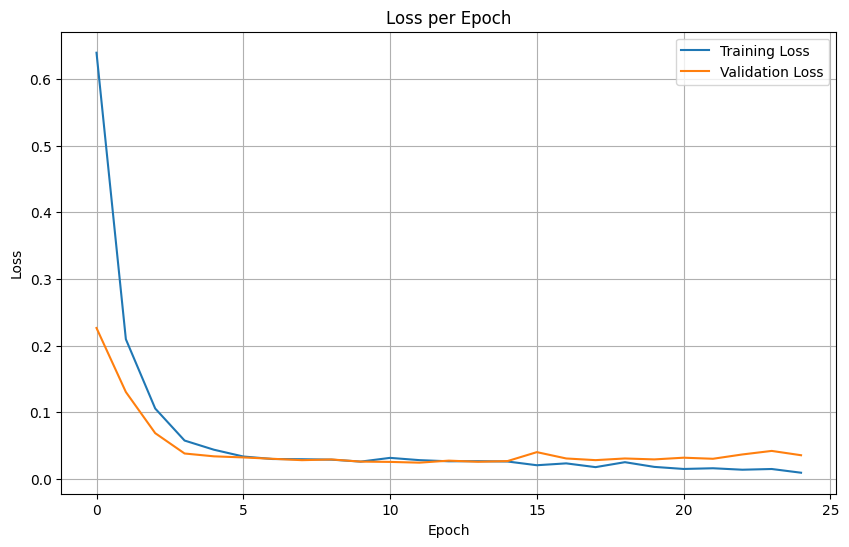

In [23]:
import matplotlib.pyplot as plt

def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_losses(train_losses, val_losses)

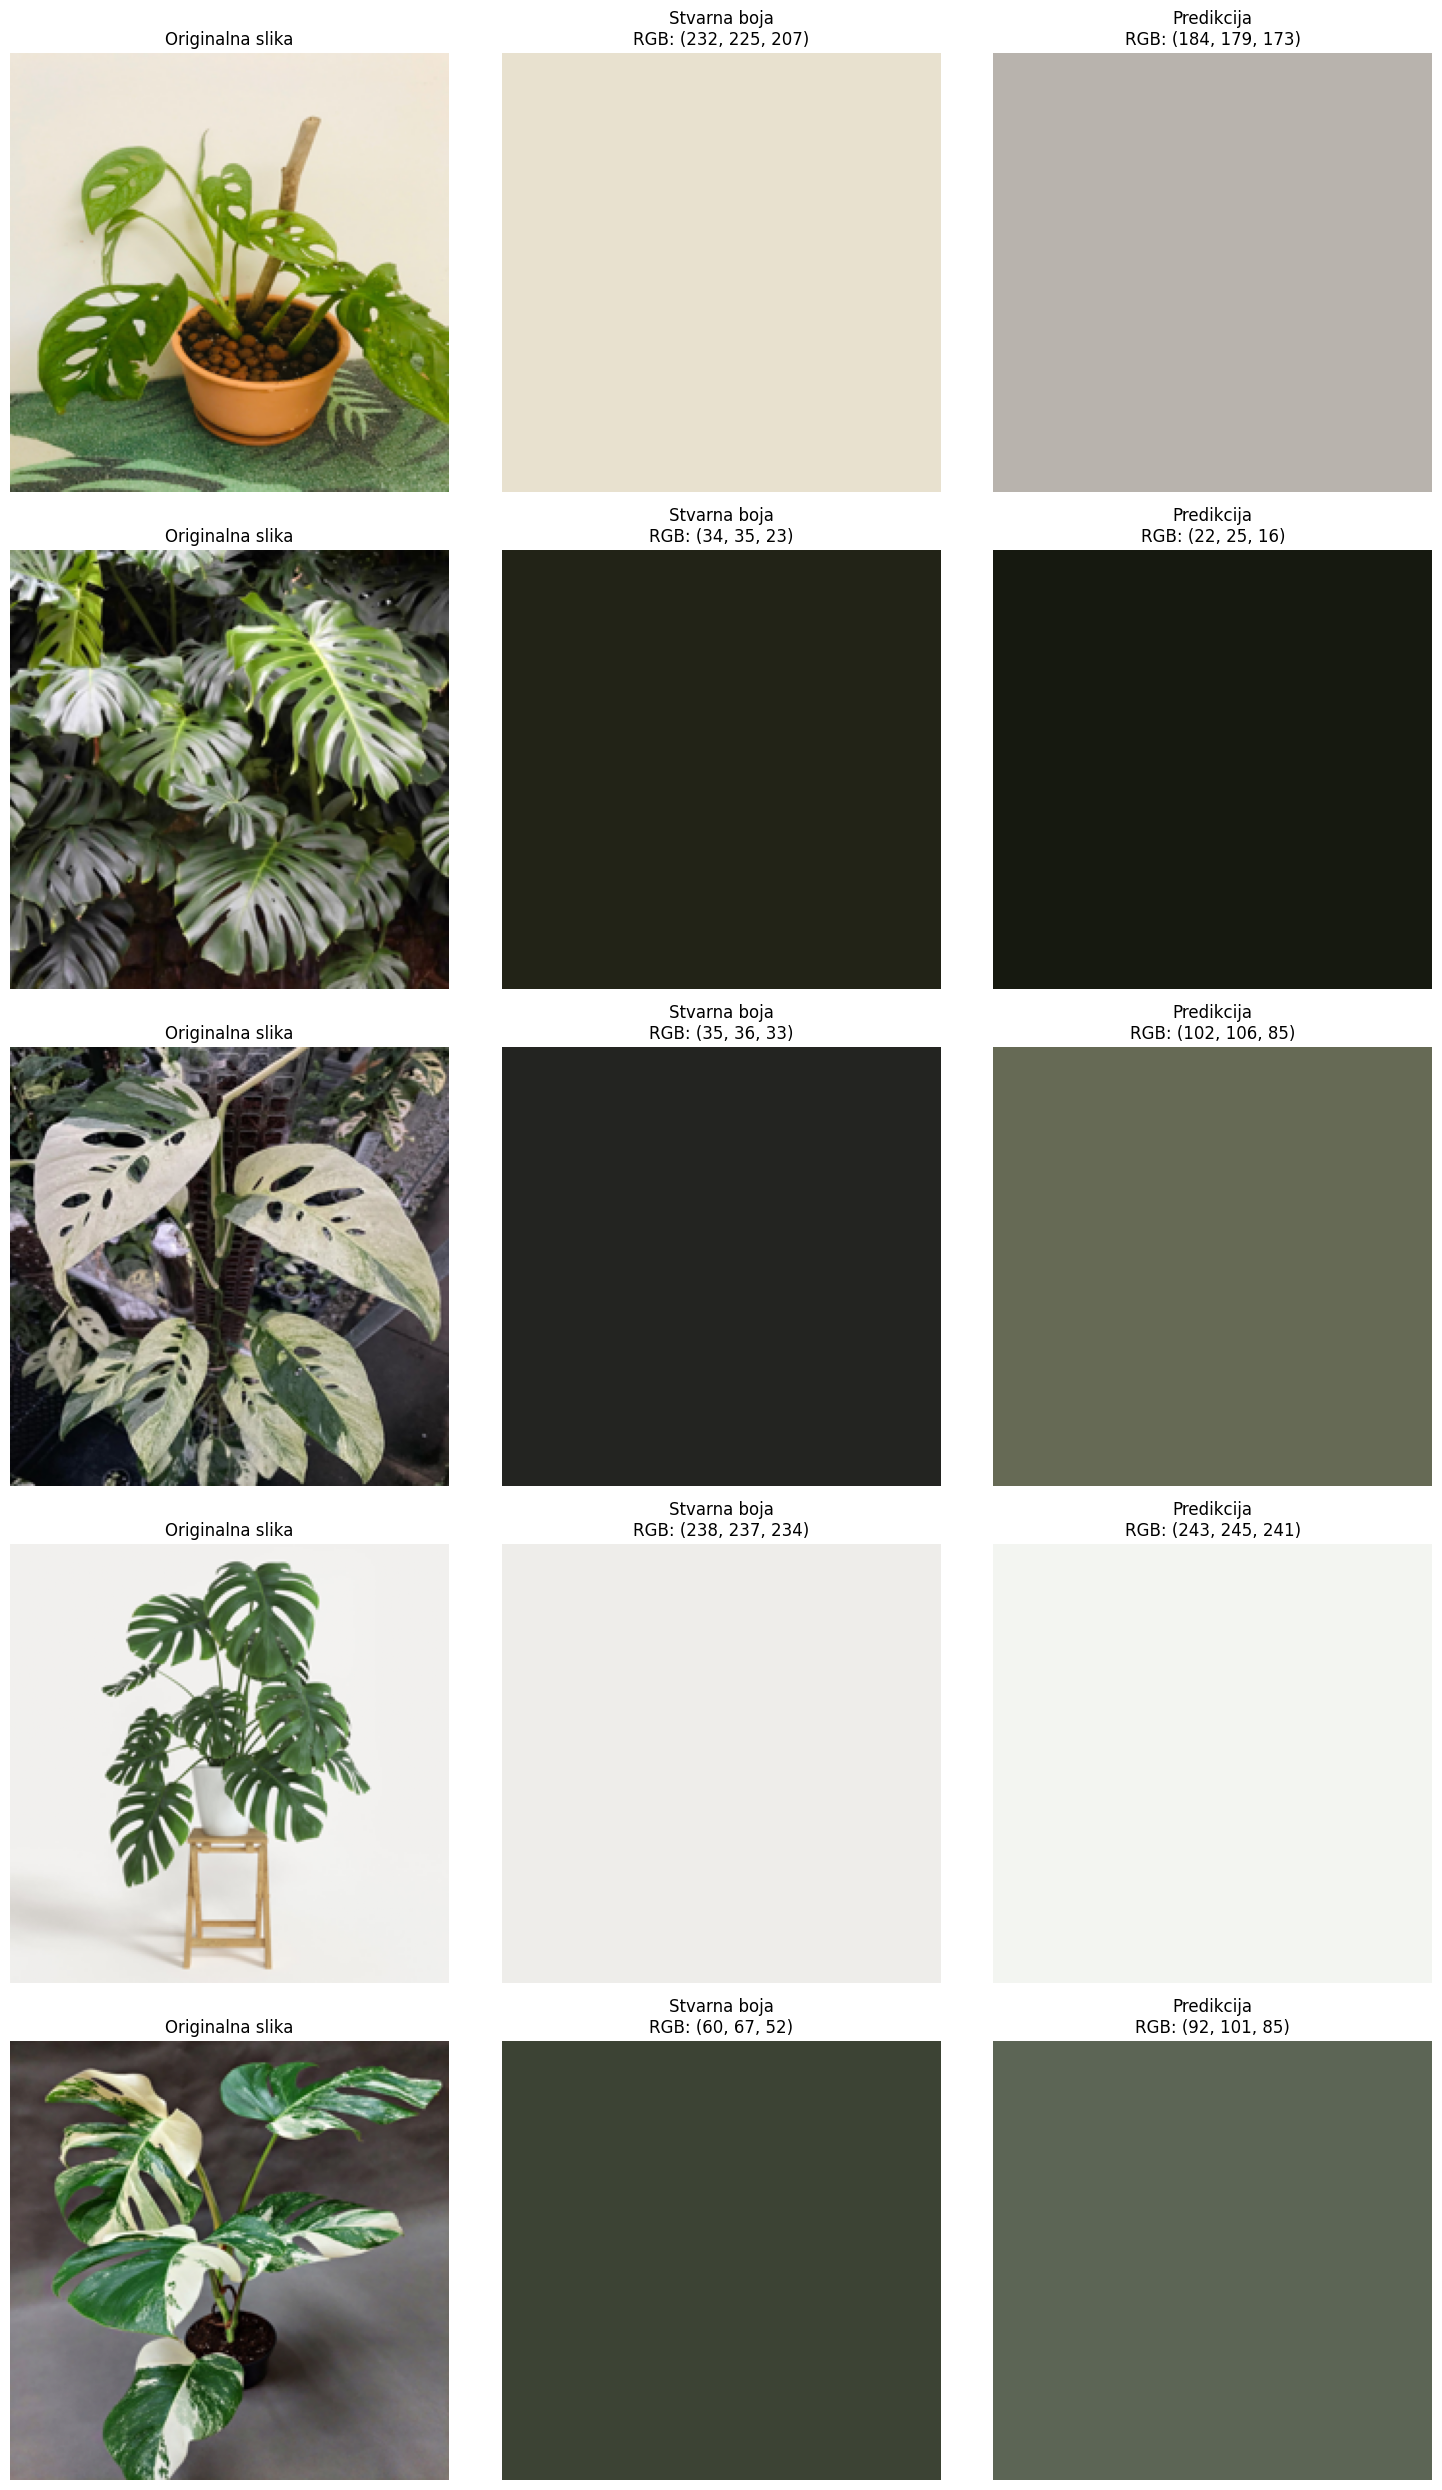

In [ ]:
def visualize_results_alexnet(model, dataset, num_samples=5):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    indices = np.random.choice(len(dataset), num_samples, replace=False)
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, num_samples * 5))

    if num_samples == 1:
        axes = np.expand_dims(axes, 0)

    for i, idx in enumerate(indices):
        img, true_color = dataset[idx]
        img = img.numpy().transpose(1, 2, 0)
        true_color = true_color.numpy()

        img_tensor = torch.tensor(img.transpose(2, 0, 1)).unsqueeze(0).to(device)
        with torch.no_grad():
            predicted_color = model(img_tensor).cpu().squeeze().numpy()

        axes[i, 0].imshow(img)
        axes[i, 0].axis('off')
        axes[i, 0].set_title("Originalna slika")

        axes[i, 1].imshow([[true_color]])
        axes[i, 1].axis('off')
        axes[i, 1].set_title(f"Stvarna boja\nRGB: {tuple((true_color * 255).astype(int))}")

        pred_color_clipped = np.clip(predicted_color, 0, 1)
        axes[i, 2].imshow([[pred_color_clipped]])
        axes[i, 2].axis('off')
        axes[i, 2].set_title(f"Predikcija\nRGB: {tuple((pred_color_clipped * 255).astype(int))}")

    plt.tight_layout()
    plt.show()

visualize_results_alexnet(model, val_dataset, num_samples=5)